### 1. Carga de datos:
  * Descarga el dataset «Iris» de Kaggle. Examina las características disponibles, que incluyen el largo y ancho de los sépalos y pétalos de tres especies de flores.
  * Asegúrate de que los datos no contengan valores nulos o atípicos.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
ruta='../data/Iris.csv'
df = pd.read_csv(filepath_or_buffer=ruta, sep=',')
df.shape

In [ ]:
df.head()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

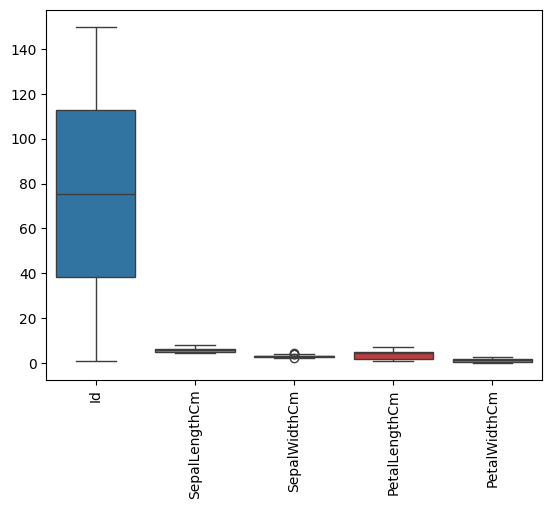

In [16]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [19]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculamos el IQR para cada columna numérica
outliers = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Determinamos los límites superior e inferior
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Identificamos los outliers
    outliers[col] = df[(df[col] < lower_limit) | (df[col] > upper_limit)]

# Mostrar los outliers por columna
for col, outlier_data in outliers.items():
    print(f"Outliers en {col}:")
    print(outlier_data)
    print("\n")

Outliers en Id:
Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


Outliers en SepalLengthCm:
Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


Outliers en SepalWidthCm:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
15  16            5.7           4.4            1.5           0.4   
32  33            5.2           4.1            1.5           0.1   
33  34            5.5           4.2            1.4           0.2   
60  61            5.0           2.0            3.5           1.0   

            Species  
15      Iris-setosa  
32      Iris-setosa  
33      Iris-setosa  
60  Iris-versicolor  


Outliers en PetalLengthCm:
Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


Outliers en PetalWidthCm:
Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
I

### 2. Exploración y preprocesamiento de datos:
  * Realiza una normalización de los datos, ya que PCA requiere que las características tengan la misma escala para funcionar de manera efectiva.
  * Observa la distribución inicial de las variables mediante gráficos de dispersión o histogramas.

In [20]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.drop('Id')  # Excluimos 'Id' que no es relevante para PCA

# Creamos un objeto StandardScaler
scaler = StandardScaler()

# Aplicamos la estandarización a las columnas numéricas
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Mostramos el dataframe normalizado
print(df_scaled.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1      -0.900681      1.032057      -1.341272     -1.312977  Iris-setosa
1   2      -1.143017     -0.124958      -1.341272     -1.312977  Iris-setosa
2   3      -1.385353      0.337848      -1.398138     -1.312977  Iris-setosa
3   4      -1.506521      0.106445      -1.284407     -1.312977  Iris-setosa
4   5      -1.021849      1.263460      -1.341272     -1.312977  Iris-setosa


In [21]:
pca = PCA(n_components=2)  # Especificamos el número de componentes principales (por ejemplo, 2)

# Ajustamos PCA a los datos normalizados
principal_components = pca.fit_transform(df_scaled[numerical_cols])

# Convertimos los resultados a un DataFrame para visualizarlos
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Mostramos los primeros resultados del PCA
print(df_pca.head())

        PC1       PC2
0 -2.264542  0.505704
1 -2.086426 -0.655405
2 -2.367950 -0.318477
3 -2.304197 -0.575368
4 -2.388777  0.674767


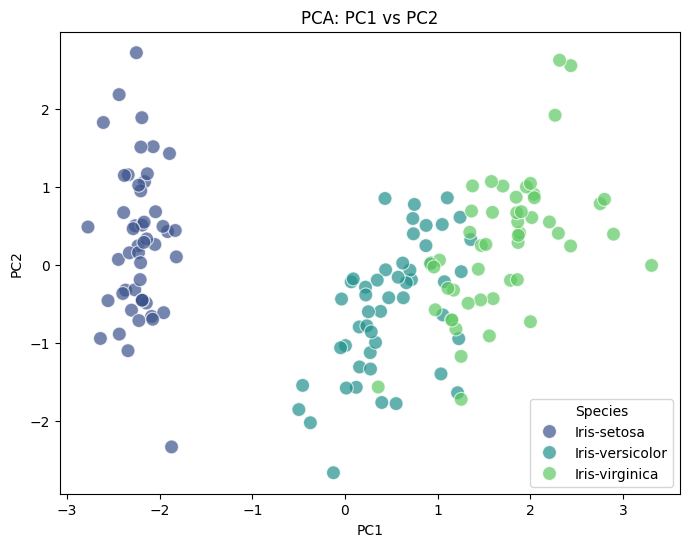

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df['Species'], palette='viridis', s=100, alpha=0.7)
plt.title('PCA: PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Species', loc='best')
plt.show()

### 3. Aplicación de PCA:
  * Implementa PCA para reducir las cuatro dimensiones del dataset «Iris» a solo dos componentes principales.
  * Calcula la «explained variance» para estos dos componentes y discute qué porcentaje de la variabilidad total de los datos está capturada en el espacio bidimensional.

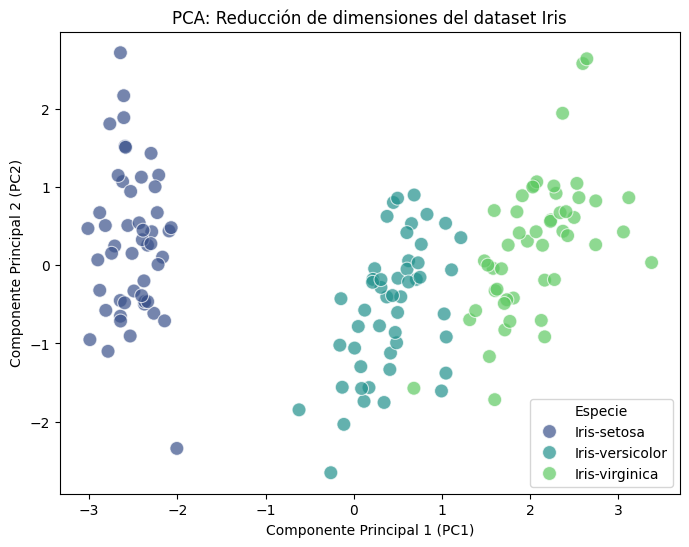

Varianza explicada por PC1: 0.7471
Varianza explicada por PC2: 0.1844


In [25]:

# 2. Seleccionar solo las columnas numéricas (sin la columna 'Species')
X = df.drop(columns='Species')

# 3. Estandarizar los datos (muy importante para PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Aplicar PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# 5. Crear un nuevo DataFrame con los componentes principales
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# 6. Añadir la columna de etiquetas 'Species' al DataFrame PCA para su visualización
df_pca['Species'] = df['Species']

# 7. Visualizar los resultados en un gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Species', data=df_pca, palette='viridis', s=100, alpha=0.7)
plt.title('PCA: Reducción de dimensiones del dataset Iris')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.legend(title='Especie', loc='best')
plt.show()

# 8. Mostrar la varianza explicada por los componentes principales
print(f"Varianza explicada por PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"Varianza explicada por PC2: {pca.explained_variance_ratio_[1]:.4f}")

In [26]:
# Paso 1: Mostrar la varianza explicada por PC1 y PC2
explained_variance_ratio = pca.explained_variance_ratio_

# Paso 2: Mostrar la varianza explicada por cada componente
print(f"Varianza explicada por PC1: {explained_variance_ratio[0]*100:.2f}%")
print(f"Varianza explicada por PC2: {explained_variance_ratio[1]*100:.2f}%")

# Paso 3: Mostrar la varianza explicada total por los dos componentes
total_explained_variance = explained_variance_ratio.sum() * 100
print(f"Varianza total explicada por PC1 y PC2: {total_explained_variance:.2f}%")

Varianza explicada por PC1: 74.71%
Varianza explicada por PC2: 18.44%
Varianza total explicada por PC1 y PC2: 93.14%


### 4. Visualización de los componentes principales:
  * Proyecta los datos en el espacio bidimensional formado por los dos primeros componentes principales.
  * Utiliza diferentes colores para representar cada una de las tres clases de flores en el gráfico y observa cómo se agrupan las clases en el espacio de los componentes principales.

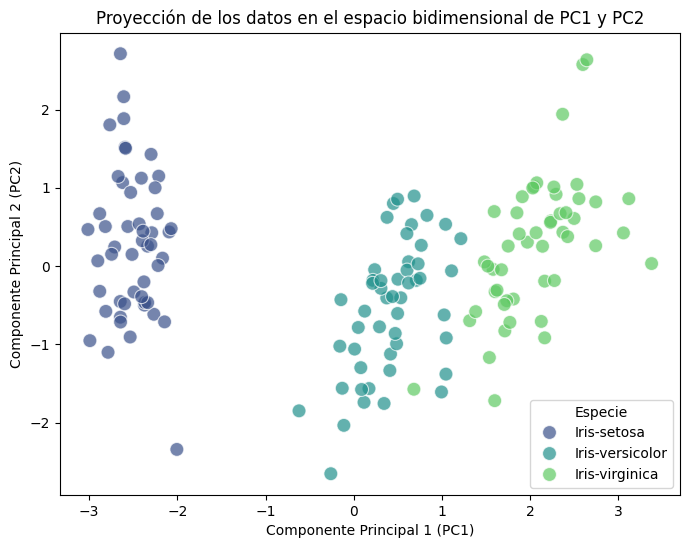

In [30]:
# Seleccionar solo las columnas numéricas (sin la columna 'Species')
X = df.drop(columns='Species')

# 3. Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Aplicar PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# 5. Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# 6. Añadir la columna de etiquetas 'Species' al DataFrame PCA
df_pca['Species'] = df['Species']

# 7. Graficar la proyección de los datos en el espacio bidimensional formado por PC1 y PC2
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Species', data=df_pca, palette='viridis', s=100, alpha=0.7)
plt.title('Proyección de los datos en el espacio bidimensional de PC1 y PC2')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.legend(title='Especie', loc='best')
plt.show()


### 5. Interpretación de los resultados:
  * Analiza los coeficientes de los dos componentes principales y explica qué variables tienen la mayor influencia en estos.
  * Discute si PCA es capaz de separar correctamente las clases y cómo este análisis puede mejorar la comprensión de los datos.

                    PC1       PC2
Id             0.481360 -0.022752
SepalLengthCm  0.448450  0.382858
SepalWidthCm  -0.231950  0.920078
PetalLengthCm  0.510792  0.030749
PetalWidthCm   0.502470  0.073568


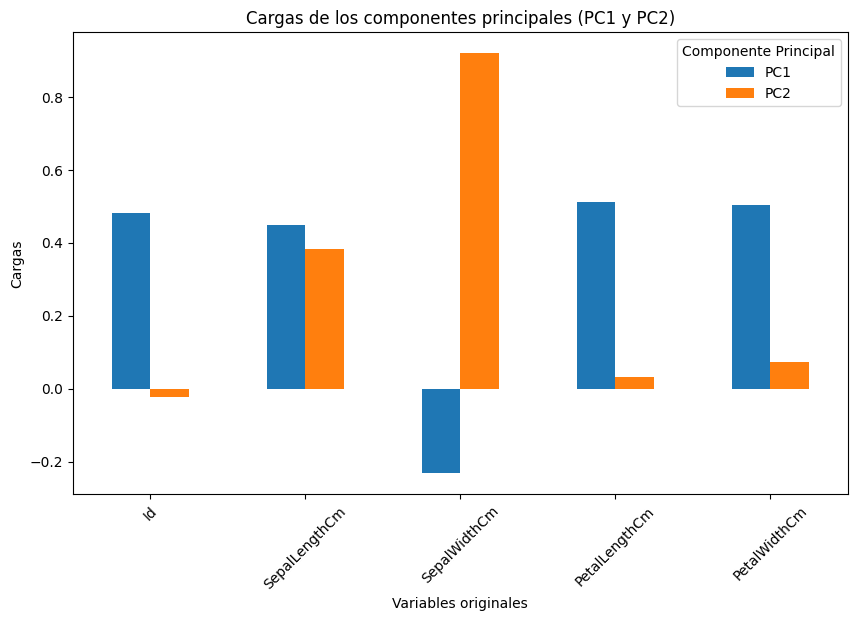

In [31]:
X = df.drop(columns='Species')

# 3. Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Aplicar PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)
pca.fit(X_scaled)

# 5. Mostrar las cargas de los componentes principales
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)

# 6. Mostrar las cargas para ver qué variables tienen más influencia en cada componente
print(loadings)

# 7. Graficar las cargas de los componentes principales
loadings.plot(kind='bar', figsize=(10, 6))
plt.title('Cargas de los componentes principales (PC1 y PC2)')
plt.xlabel('Variables originales')
plt.ylabel('Cargas')
plt.xticks(rotation=45)
plt.legend(title='Componente Principal')
plt.show()

Aunque PCA no siempre es capaz de separar perfectamente las clases, como se observa en la superposición de Versicolor y Virginica, es una herramienta útil para reducir la dimensionalidad y mejorar la comprensión de los datos. Ayuda a identificar qué características son más importantes, a visualizar la distribución de las clases y a explorar la variabilidad de los datos. En casos donde PCA no logra una separación óptima de las clases, técnicas supervisadas como clasificadores pueden ser más efectivas para distinguir entre clases, pero PCA sigue siendo una excelente técnica exploratoria.